<a href="https://colab.research.google.com/github/bhagesh-codebeast/peakalt/blob/development/PeakAlt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install biopython
! pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 11.4 MB/s eta 0:00:00


In [2]:
from Bio import SeqIO
from Bio.Blast.NCBIWWW import qblast
from collections import defaultdict
import matplotlib.pyplot as plt
from Bio.Blast import NCBIXML

# Introduction

Intro: https://www.nucleics.com/wp-content/uploads/2014/04/PeakTrace-Whitepaper.pdf

Data: https://github.com/y9c/cfutils/blob/master/data/B5-M13R_B07.ab1

In [53]:
! ls -lrth sample_data/B5-M13R_B07.ab1
# ! ls -lrth sample_data/A-372711_A5.ab1

-rw-r--r-- 1 root root 289K Dec 23 12:32 sample_data/B5-M13R_B07.ab1


In [54]:
record = SeqIO.read("sample_data/A-372711_A5.ab1", "abi")

In [55]:
type(record)

Bio.SeqRecord.SeqRecord

In [56]:
record

SeqRecord(seq=Seq('TATGGGGGACCATTGCTTACCTCCCATTGACCTTATGTACTGGGCAAAACCCAT...TCG'), id='A-372711_A5', name='A-372711_A5', description='', dbxrefs=[])

In [57]:
record.id

'A-372711_A5'

In [11]:
record.name

'A-372711_A5'

In [59]:
len(record.seq)
# str(record.seq)

1182

In [60]:
record.annotations.keys()

dict_keys(['sample_well', 'dye', 'polymer', 'machine_model', 'run_start', 'run_finish', 'abif_raw', 'molecule_type'])

In [61]:
record.annotations['sample_well']

b'A5'

In [62]:
record.annotations['dye']

b'Z-BigDyeV3'

In [63]:
record.annotations['polymer']

b'POP7                            '

In [64]:
record.annotations['machine_model']

b'3730'

In [65]:
(record.annotations['run_start'], record.annotations['run_finish'])

('2023-04-11 18:48:28', '2023-04-11 20:36:18')

In [66]:
record.annotations['abif_raw'].keys()

dict_keys(['AEPt1', 'AEPt2', 'APFN2', 'APXV1', 'APrN1', 'APrV1', 'APrX1', 'ARTN1', 'ASPF1', 'ASPt1', 'ASPt2', 'AUDT1', 'B1Pt1', 'B1Pt2', 'BCTS1', 'BufT1', 'CMNT1', 'CTID1', 'CTNM1', 'CTOw1', 'CTTL1', 'CpEP1', 'DATA1', 'DATA2', 'DATA3', 'DATA4', 'DATA5', 'DATA6', 'DATA7', 'DATA8', 'DATA9', 'DATA10', 'DATA11', 'DATA12', 'DCHT1', 'DSam1', 'DySN1', 'Dye#1', 'DyeN1', 'DyeN2', 'DyeN3', 'DyeN4', 'DyeW1', 'DyeW2', 'DyeW3', 'DyeW4', 'EPVt1', 'EVNT1', 'EVNT2', 'EVNT3', 'EVNT4', 'FTab1', 'FVoc1', 'FWO_1', 'Feat1', 'GTyp1', 'HCFG1', 'HCFG2', 'HCFG3', 'HCFG4', 'InSc1', 'InVt1', 'LANE1', 'LAST1', 'LIMS1', 'LNTD1', 'LsrP1', 'MCHN1', 'MODF1', 'MODL1', 'NAVG1', 'NLNE1', 'NOIS1', 'P1AM1', 'P1RL1', 'P1WD1', 'P2AM1', 'P2BA1', 'P2RL1', 'PBAS1', 'PBAS2', 'PCON1', 'PCON2', 'PDMF1', 'PDMF2', 'PLOC1', 'PLOC2', 'PSZE1', 'PTYP1', 'PXLB1', 'RGNm1', 'RGOw1', 'RMXV1', 'RMdN1', 'RMdV1', 'RMdX1', 'RPrN1', 'RPrV1', 'RUND1', 'RUND2', 'RUND3', 'RUND4', 'RUNT1', 'RUNT2', 'RUNT3', 'RUNT4', 'Rate1', 'RunN1', 'S/N%1', 'SCAN

Plot: https://biopython.org/wiki/ABI_traces

In [29]:
channels = ["DATA9", "DATA10", "DATA11", "DATA12", "FWO_1", "PLOC1", "PCON1"]
trace = defaultdict(list)
for c in channels:
    trace[c] = record.annotations["abif_raw"][c]

Nucleotide channels: https://www.reddit.com/r/bioinformatics/comments/buswph/manual_creation_of_chromatogram_from_ab1_sanger/





["DATA9"] = corrected signals for base G

["DATA10"] = corrected signals for base A

["DATA11"] = corrected signals for base T

["DATA12"] = corrected signals for base C

["PBAS1"] = the actual base-calls or sequence

["FWO_1"] = GATC (corresponds to base order of DATA9-DATA12)

["PLOC1"] = peak locations

["PCON1"] = phred scores for each base


Pred Score: https://www.nucleics.com/wp-content/uploads/2014/04/PeakTrace-Whitepaper.pdf

In [68]:
trace["PLOC1"][:10]

(3, 16, 28, 38, 46, 58, 65, 81, 105, 128)

In [69]:
trace["PCON1"][:10]

b'\x03\x03\x03\x05\x03\x03\x03\x04\x0b\x08'

In [70]:
[x for x in trace["PCON1"][:10]]

[3, 3, 3, 5, 3, 3, 3, 4, 11, 8]

In [71]:
list(trace["DATA9"][:10])

[179, 183, 190, 202, 220, 244, 267, 285, 299, 312]

In [72]:
list(trace["DATA10"][:10])

[424, 432, 448, 474, 514, 560, 603, 630, 646, 659]

In [73]:
list(trace["DATA11"][:10])

[134, 139, 150, 168, 195, 229, 264, 292, 316, 340]

In [74]:
list(trace["DATA12"][:10])

[12, 12, 13, 14, 16, 19, 22, 24, 25, 25]

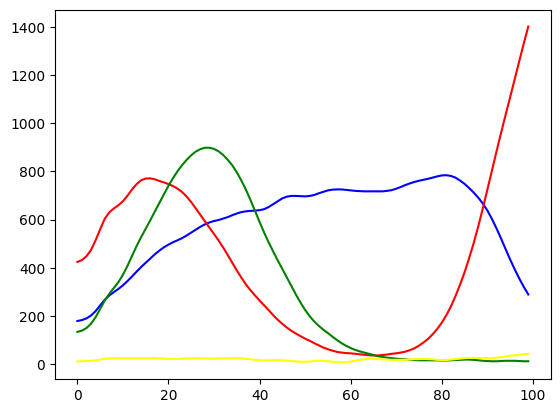

In [31]:
plt.plot(trace["DATA9"][:100], color="blue")
plt.plot(trace["DATA10"][:100], color="red")
plt.plot(trace["DATA11"][:100], color="green")
plt.plot(trace["DATA12"][:100], color="yellow")
plt.show()

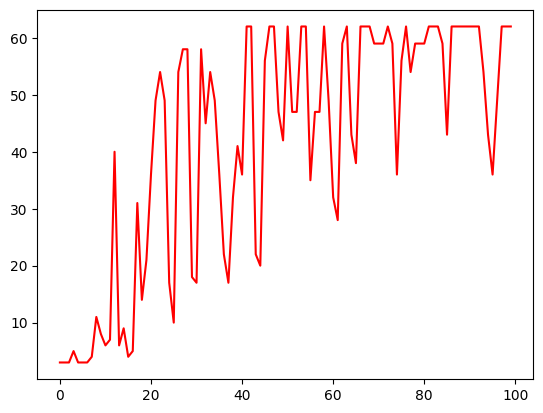

In [38]:
plt.plot([x for x in trace["PCON1"][:100]], color="red")
plt.show()

In [76]:
record.annotations['molecule_type']

'DNA'

# BLAST

In [7]:
help(qblast)

Help on function qblast in module Bio.Blast.NCBIWWW:

qblast(program, database, sequence, url_base='https://blast.ncbi.nlm.nih.gov/Blast.cgi', auto_format=None, composition_based_statistics=None, db_genetic_code=None, endpoints=None, entrez_query='(none)', expect=10.0, filter=None, gapcosts=None, genetic_code=None, hitlist_size=50, i_thresh=None, layout=None, lcase_mask=None, matrix_name=None, nucl_penalty=None, nucl_reward=None, other_advanced=None, perc_ident=None, phi_pattern=None, query_file=None, query_believe_defline=None, query_from=None, query_to=None, searchsp_eff=None, service=None, threshold=None, ungapped_alignment=None, word_size=None, short_query=None, alignments=500, alignment_view=None, descriptions=500, entrez_links_new_window=None, expect_low=None, expect_high=None, format_entrez_query=None, format_object=None, format_type='XML', ncbi_gi=None, results_file=None, show_overview=None, megablast=None, template_type=None, template_length=None, username='blast', password=No

In [4]:
def get_blast_program(record):
  if record.annotations['molecule_type'] == 'DNA':
    return 'blastn'

In [5]:
record = SeqIO.read("sample_data/A-372711_A5.ab1", "abi")
get_blast_program(record)

'blastn'

In [6]:
%%time

blast_XML = "sample_data/blast.XML"

blast = qblast(
    program = get_blast_program(record),
    sequence = record.seq,
    database = "nr",
    hitlist_size = 5)

with open(blast_XML, "w") as result_file:
    result_file.write(blast.read())

blast.close()

CPU times: user 599 ms, sys: 89.5 ms, total: 689 ms
Wall time: 2min 2s


In [23]:
with open(blast_XML) as result_file:
  blast_records = NCBIXML.parse(result_file)
  for blast_record in blast_records:
    for alignment in blast_record.alignments:
      hsp = alignment.hsps[0]
      start_coord = hsp.query_start
      end_coord = hsp.query_end
      print(start_coord,end_coord)

430 1163
430 1163
430 1163
430 1163
430 1163


In [24]:
# for blast_record in blast_records:
#   for alignment in blast_record.alignments:
#     print(f"Sequence: {alignment.title}")
#     for hsp in alignment.hsps[0]:
#       print(f"  Score: {hsp.score}")
#       print(f"  E-value: {hsp.expect}")
#       print(f"  Alignment: {hsp.align_length} nucleotides")
#       print(f"  TotalSeqLen: {len(record.seq)} nucleotides")

# Low Quality Region

In [27]:
record = SeqIO.read("sample_data/A-372711_A5.ab1", "abi")

# Correction

# Machine Learning

# Export AB1 file

In [ ]:
record = SeqIO.read("sample_data/A-372711_A5.ab1", "abi")